In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris, make_moons

from sklearn.cluster import KMeans

# digit 

In [2]:
data = load_iris()

In [3]:
X = data.data
label = data.target

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# noisy_moons

In [19]:
noisy_moons = make_moons(n_samples=100, noise=.05)[0]

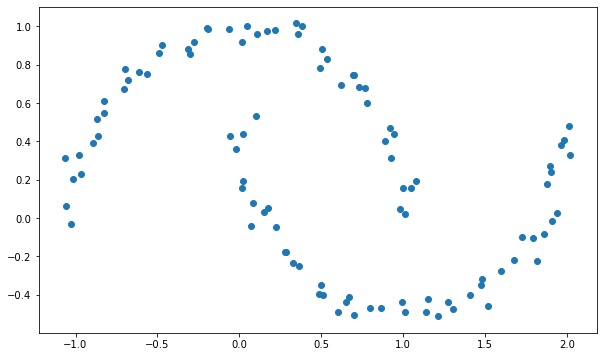

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(noisy_moons[:,0], noisy_moons[:,1])
plt.savefig('noisy_moons.png')
plt.show()

# PCA

In [7]:
from sklearn.decomposition import KernelPCA

In [8]:
kpca = KernelPCA(n_components=2)
kPCA_X = kpca.fit_transform(X)

# True

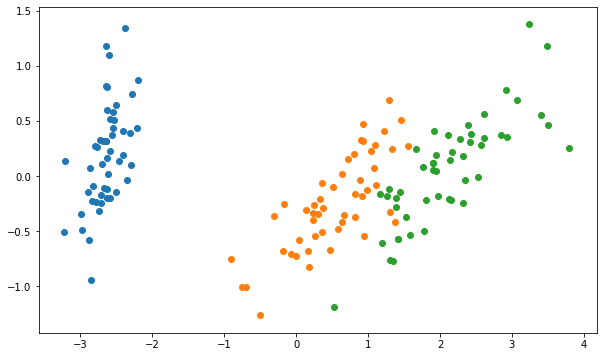

In [9]:
plt.figure(figsize=(10, 6))
for i in set(label):
    sub_x = kPCA_X[label==i]
    plt.scatter(sub_x[:,0], sub_x[:,1])
plt.show()

# k-means by sklearn

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
pred = kmeans.fit_predict(X)

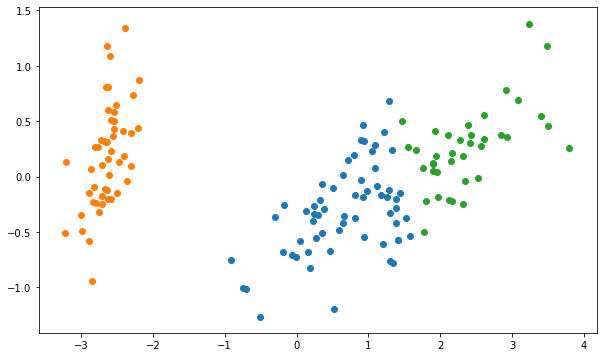

In [11]:
plt.figure(figsize=(10, 6))
for i in set(pred):
    sub_x = kPCA_X[pred==i]
    plt.scatter(sub_x[:,0], sub_x[:,1])
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 1)
pred = kmeans.fit_predict(noisy_moons)

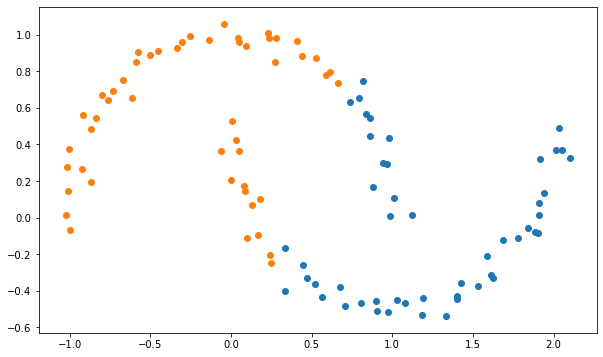

In [13]:
plt.figure(figsize=(10, 6))
for i in set(pred):
    sub_x = noisy_moons[pred==i]
    plt.scatter(sub_x[:,0], sub_x[:,1])
plt.show()

# DBSCAN 
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

In [14]:
from sklearn.cluster import DBSCAN

In [57]:
dbscan_pred = DBSCAN(eps=0.6).fit_predict(X)

{0, 1, -1}


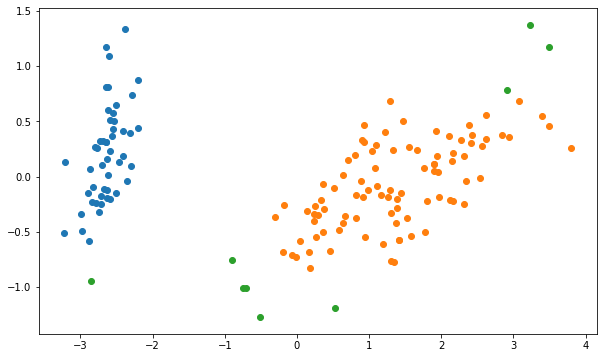

In [58]:
plt.figure(figsize=(10, 6))
print(set(dbscan_pred))
for i in set(dbscan_pred):
    sub_x = kPCA_X[dbscan_pred==i]
    plt.scatter(sub_x[:,0], sub_x[:,1])
plt.show()

In [23]:
dbscan_pred = DBSCAN(0.3, 6).fit_predict(noisy_moons)

{0, 1}


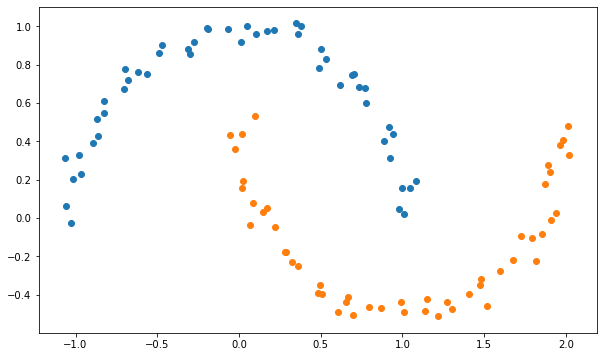

In [24]:
plt.figure(figsize=(10, 6))
print(set(dbscan_pred))
for i in set(dbscan_pred):
    sub_x = noisy_moons[dbscan_pred==i]
    plt.scatter(sub_x[:,0], sub_x[:,1])
plt.savefig('noisy_moons_DBSCAN.png')
plt.show()